In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [10]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [11]:
data.shape

(9134, 24)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [13]:
#Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [14]:
#Change effective to date column to datetime format.
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])


/var/folders/2y/5pcj8yyj4cz7r41jx92k686h0000gn/T/ipykernel_49635/3911757930.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])


In [15]:
#Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.
numerical_df = data.select_dtypes(include=['int64', 'float64'])
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [16]:
numerical_df['months_since_policy_inception'].nunique()

100

In [17]:
#Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df
def categorize_variables(data):
    continuous_df = []
    discrete_df = []

    for col in numerical_df.columns:
        if numerical_df[col].nunique() > 101 :
            continuous_df.append(col)
        else:
            discrete_df.append(col)

    return continuous_df, discrete_df


In [18]:
continuous_df, discrete_df = categorize_variables(numerical_df)
continuous_df = numerical_df[continuous_df]
discrete_df = numerical_df[discrete_df]




In [19]:
display(continuous_df)
discrete_df

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


In [20]:
#Plot a correlation matrix, comment what you see.
correlation_matrix = numerical_df.corr()
correlation_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<Axes: >

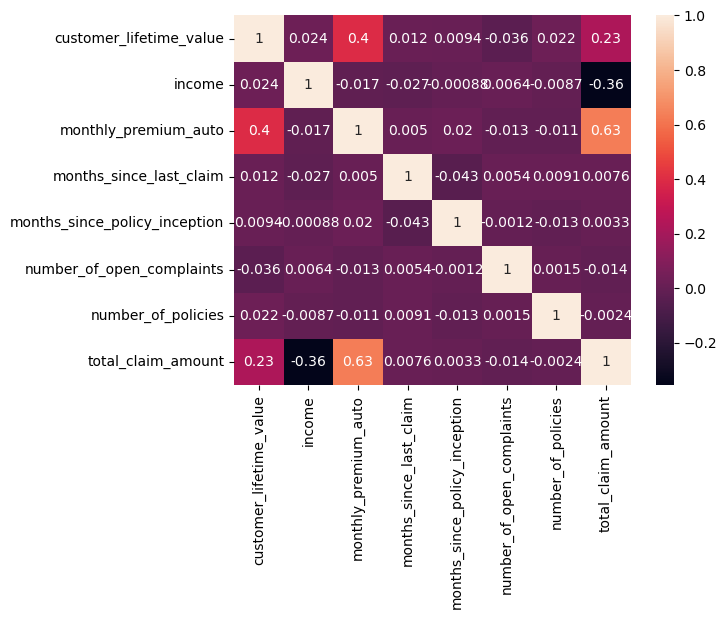

In [21]:
sns.heatmap(correlation_matrix, annot=True)
# no correlation to mention between the variables as most of them have a categorical , apart from the correlation between total_claim_amount and monthly_premium_auto 

In [22]:
#Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

def plot_discrete_variables(discrete_df):
    for col in discrete_df.columns:
        unique_values = discrete_df[col].nunique()
        if unique_values > 12:
            grouped_values = pd.cut(discrete_df[col], bins=[-float('inf'), 12, 24, 36, 48, float('inf')], labels=['up to 12 months', '12-24 months', '24-36 months', '36-48 months', 'More than 48 months'])
            sns.countplot(x=grouped_values, data=discrete_df)
            plt.xticks(rotation=45)
            plt.show()
        else:
            sns.countplot(x=col, data=discrete_df)
            plt.show()

In [23]:
def plot_continuous_variables(continuous_df):
    for col in continuous_df.columns:
        sns.histplot(continuous_df[col], kde=True)
        plt.show()

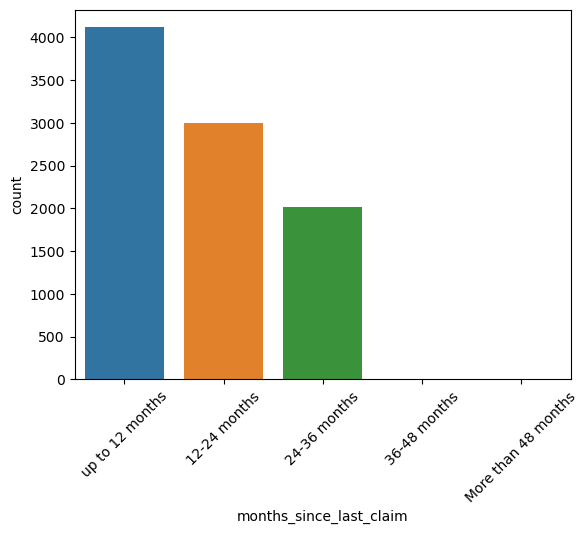

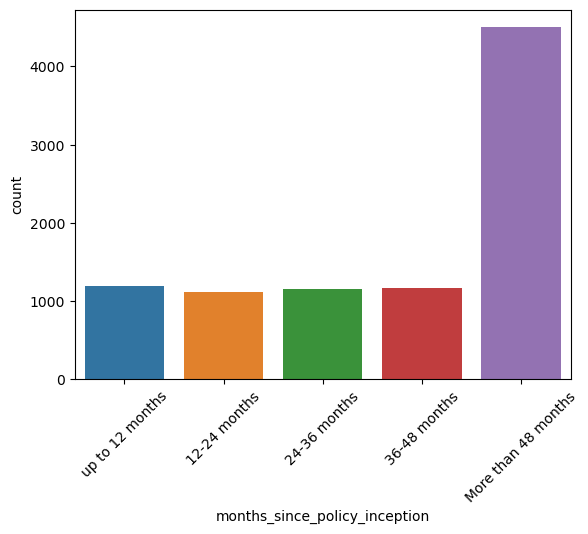

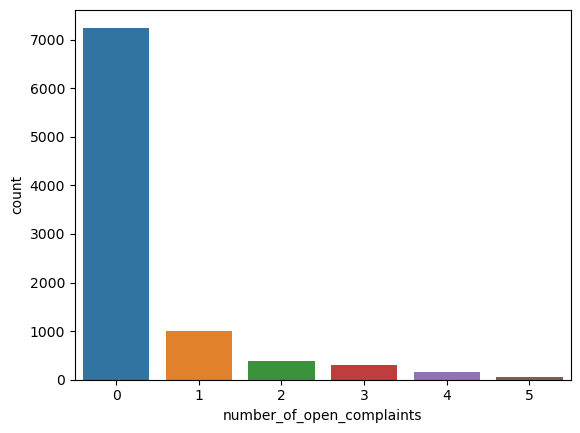

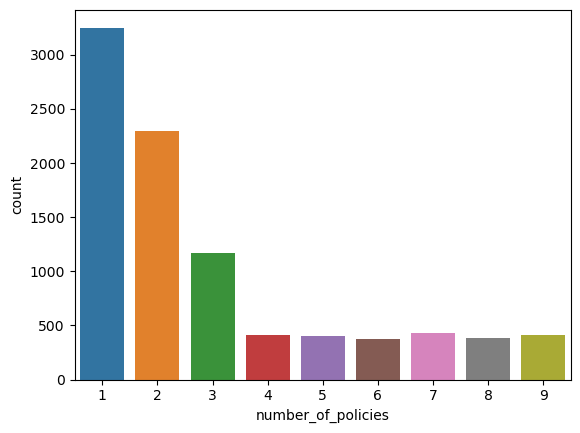

In [24]:
plot_discrete_variables(discrete_df)

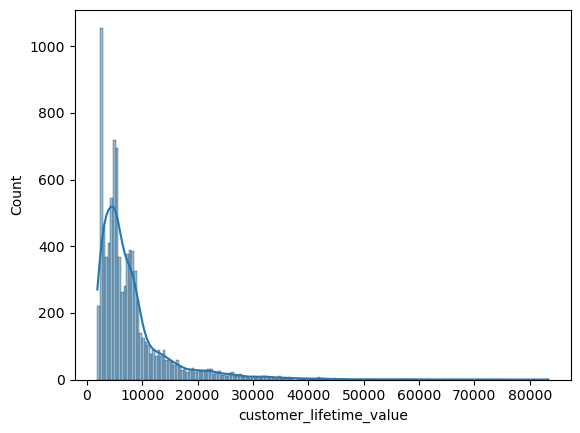

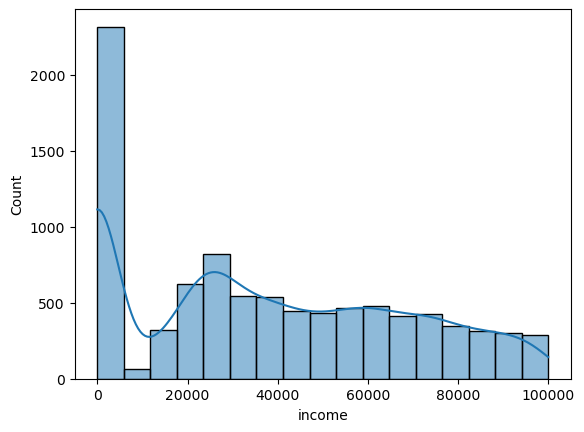

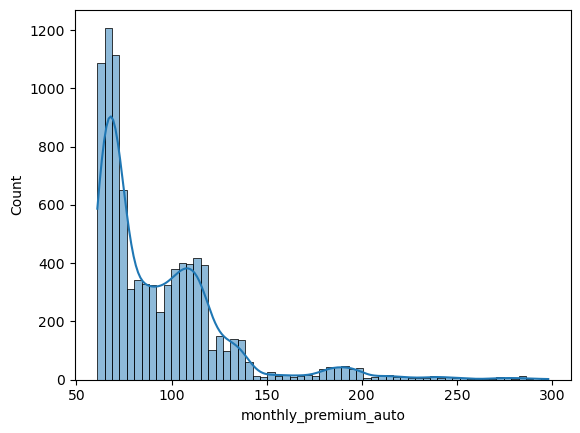

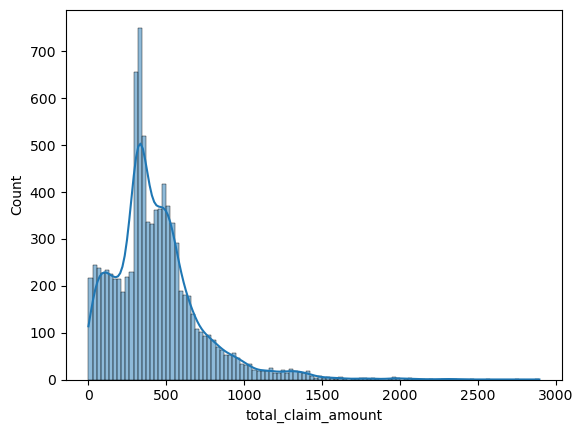

In [25]:
plot_continuous_variables(continuous_df)

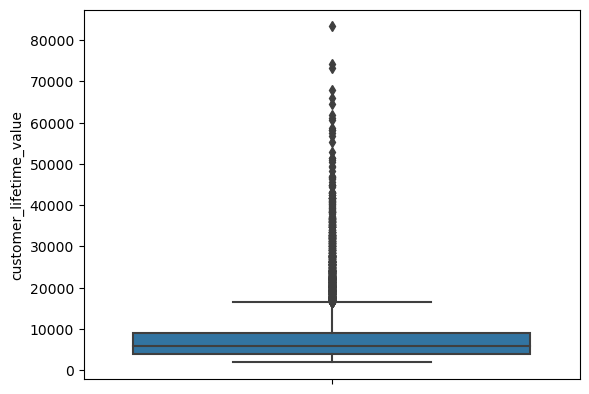

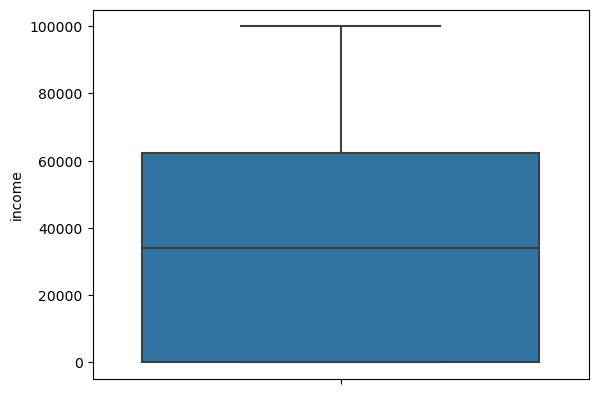

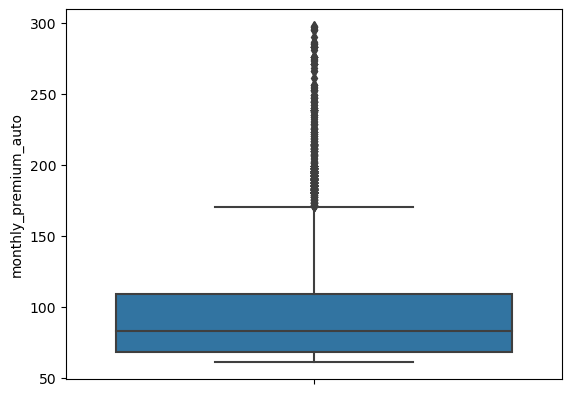

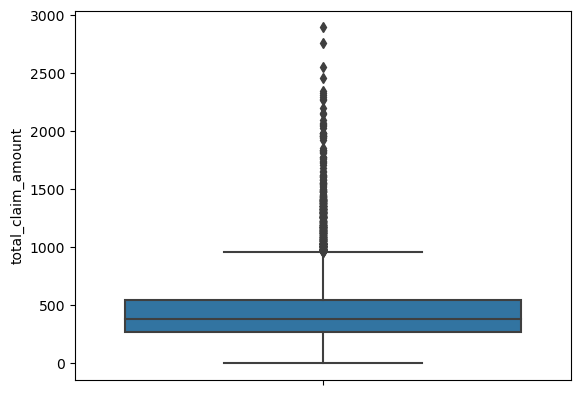

In [26]:
for col in continuous_df.columns:
        sns.boxplot(y=continuous_df[col])
        plt.show()


In [27]:
#removing outliers
Q1 = continuous_df.quantile(0.25)
Q3 = continuous_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_no_outliers = continuous_df[(continuous_df >= lower_bound) & (continuous_df <= upper_bound)]
continuous_df = data_no_outliers

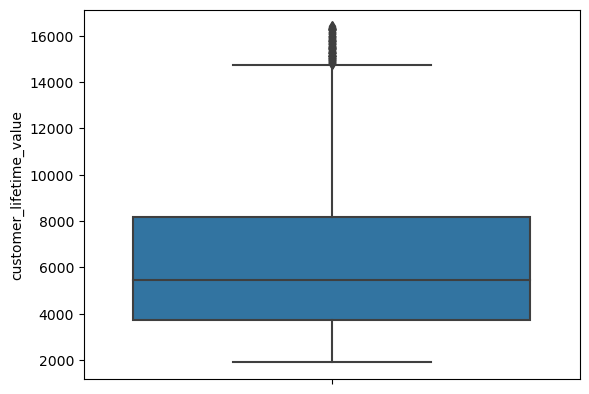

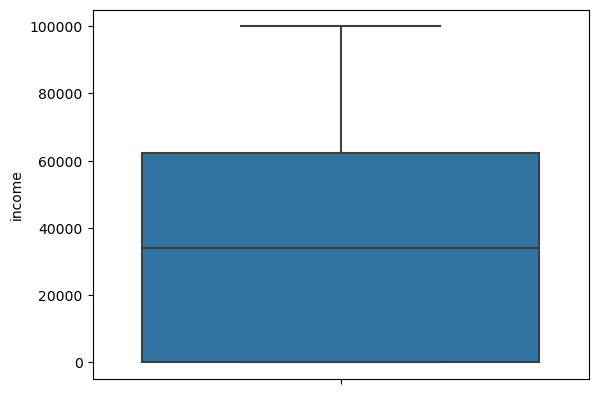

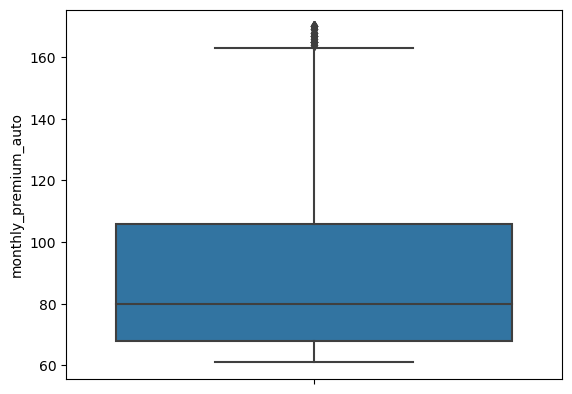

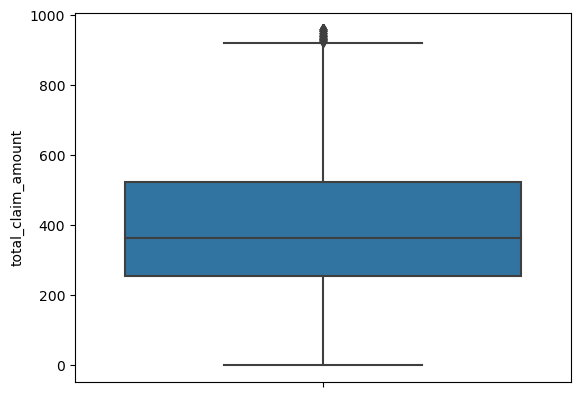

In [28]:
for col in continuous_df.columns:
        sns.boxplot(y=continuous_df[col])
        plt.show()

In [29]:
#updating the main dataframe and the numerical.df by removing the columns and merging continuous_df without the outliers
data.drop(columns=['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount'], inplace=True)
data1 = pd.concat([data, continuous_df], axis=1)
data = data1

In [30]:
#updating numerical_df
numerical_df.drop(columns=['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount'], inplace=True)
numerical_df1 = pd.concat([numerical_df, continuous_df], axis=1)
numerical_df = numerical_df1

In [31]:
#checking for Nulls
numerical_df.isnull().sum()

months_since_last_claim            0
months_since_policy_inception      0
number_of_open_complaints          0
number_of_policies                 0
customer_lifetime_value          817
income                             0
monthly_premium_auto             430
total_claim_amount               453
dtype: int64

In [32]:
#since outliers have been removed, i'm going to fill the Nulls with the mean.
columns_with_null = ['customer_lifetime_value', 'monthly_premium_auto','total_claim_amount']
data = data.fillna(data[columns_with_null].mean())
numerical_df = numerical_df.fillna(data[columns_with_null].mean())

In [33]:
numerical_df.to_csv('numerical_df.csv', index=False)

In [34]:
#End of cleaning numerical data


Lab | Cleaning categorical data

In [35]:
#Find all of the categorical data. Save it in a categorical_df variable
categorical_df = data.select_dtypes(include=['category', 'object', 'datetime64'])
categorical_df

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [36]:
#checking Null values
categorical_df.isnull().sum()

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [37]:
#checking all unique values in all the columns
categorical_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [38]:
#checking dtypes
categorical_df.dtypes

customer                     object
state                        object
response                     object
coverage                     object
education                    object
effective_to_date    datetime64[ns]
employmentstatus             object
gender                       object
location_code                object
marital_status               object
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
dtype: object

In [39]:
#Does any column contain alpha and numeric data? Decide how to clean it and do it now.
#Customer and effective to date should be dropped.
categorical_df.drop(columns=['customer'], inplace=True)

In [40]:
#Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
#No categorical_df looks clean this way.
for col in categorical_df:
    print(f"{col}:  {categorical_df[col].unique()}")

state:  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response:  ['No' 'Yes']
coverage:  ['Basic' 'Extended' 'Premium']
education:  ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
effective_to_date:  <DatetimeArray>
['2011-02-24 00:00:00', '2011-01-31 00:00:00', '2011-02-19 00:00:00',
 '2011-01-20 00:00:00', '2011-02-03 00:00:00', '2011-01-25 00:00:00',
 '2011-01-18 00:00:00', '2011-01-26 00:00:00', '2011-02-17 00:00:00',
 '2011-02-21 00:00:00', '2011-01-06 00:00:00', '2011-02-06 00:00:00',
 '2011-01-10 00:00:00', '2011-01-17 00:00:00', '2011-01-05 00:00:00',
 '2011-02-27 00:00:00', '2011-01-14 00:00:00', '2011-01-21 00:00:00',
 '2011-02-05 00:00:00', '2011-01-29 00:00:00', '2011-02-28 00:00:00',
 '2011-02-12 00:00:00', '2011-02-02 00:00:00', '2011-02-07 00:00:00',
 '2011-01-22 00:00:00', '2011-02-13 00:00:00', '2011-01-15 00:00:00',
 '2011-01-08 00:00:00', '2011-01-11 00:00:00', '2011-01-28 00:00:00',
 '2011-02-08 00:00:00', '2011-02-23 00:00:00', '2011-01-02

In [41]:
#Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

#1-'policy_type' provides 3 categories to the insurance policies 
#2-where 'policy' provides more detailed categories to the policy which might specifies what excactly is covered in this policy etc. 
#3-it depends on what we are aiming for to choose which one is more important.

In [42]:
#Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.
for col in categorical_df:
    print(f"{col}:  {categorical_df[col].nunique()}")

state:  5
response:  2
coverage:  3
education:  5
effective_to_date:  59
employmentstatus:  5
gender:  2
location_code:  3
marital_status:  3
policy_type:  3
policy:  9
renew_offer_type:  4
sales_channel:  4
vehicle_class:  6
vehicle_size:  3


In [43]:
#since it's not clear what we are aiming for, i will drop policy_type and keep policy, because it contains more info. 
categorical_df.drop(columns=['policy_type'], inplace=True)
categorical_df

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large


In [44]:
#saving the categorical_df into csv file
categorical_df.to_csv('categorical_df.csv', index=False)

In [45]:
#End of lab-cleaning-categorical-data

Lab | Feature extraction

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [47]:
categorical = pd.read_csv('categorical_df.csv')

In [48]:
categorical

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large


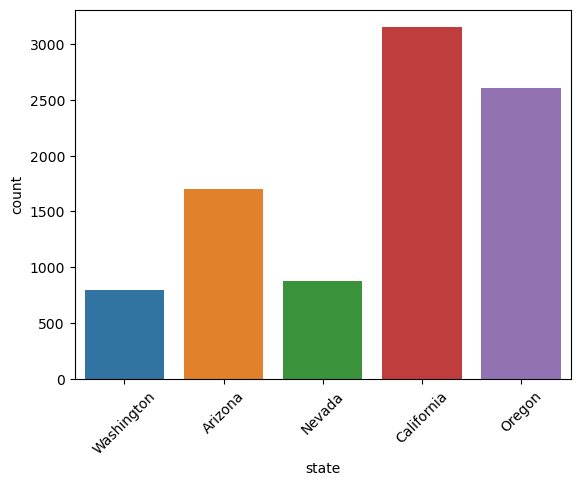

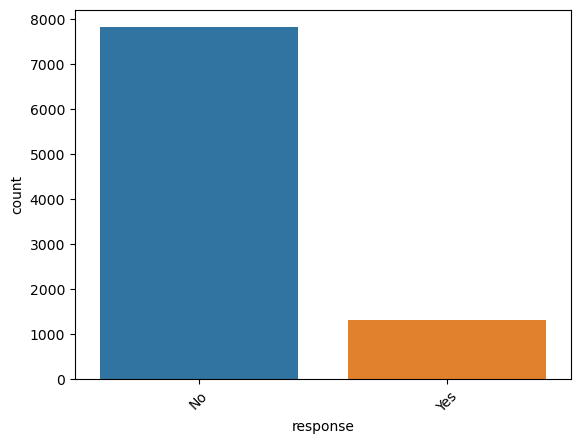

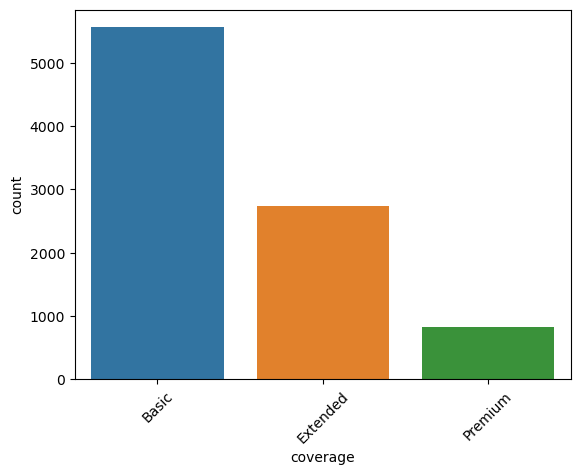

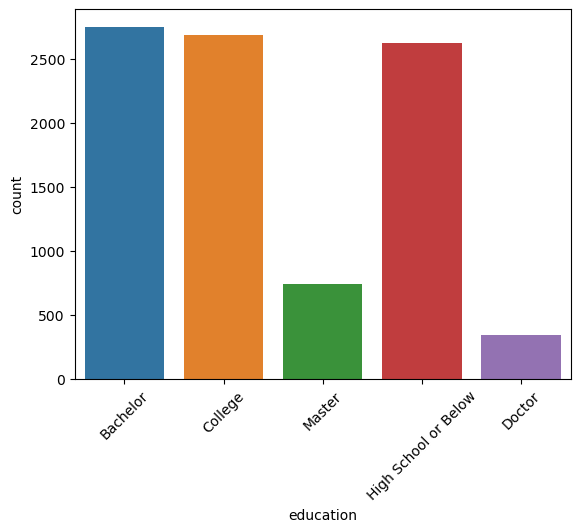

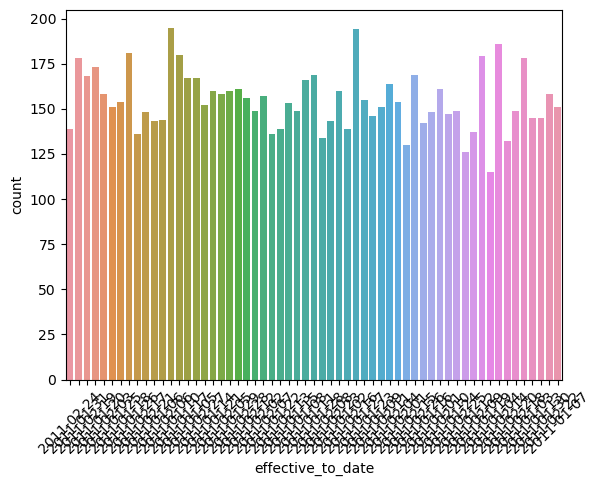

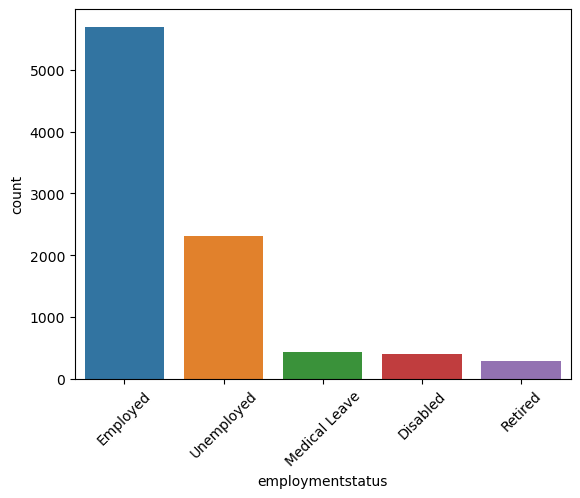

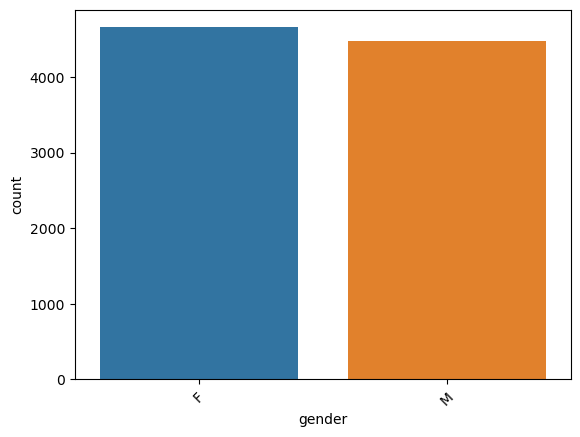

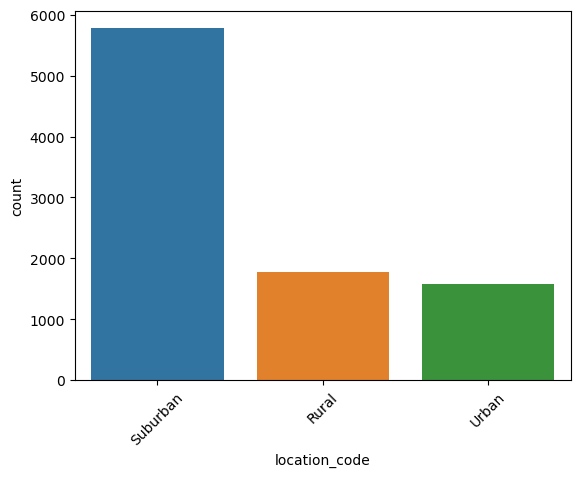

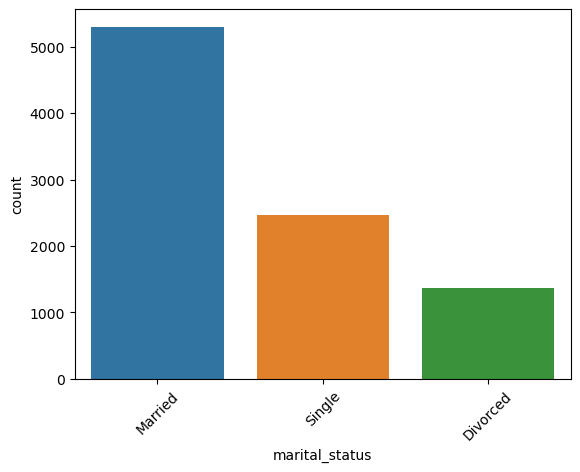

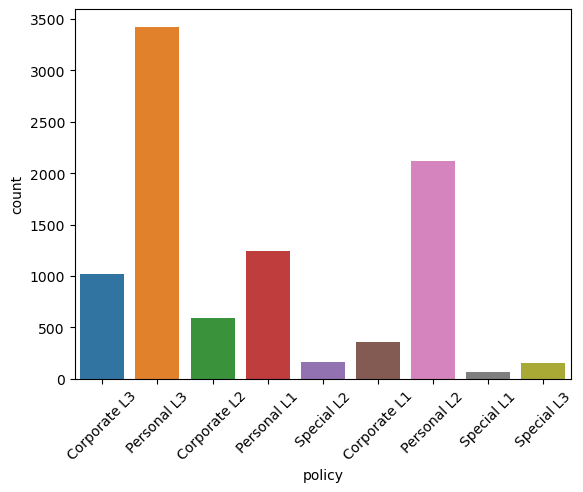

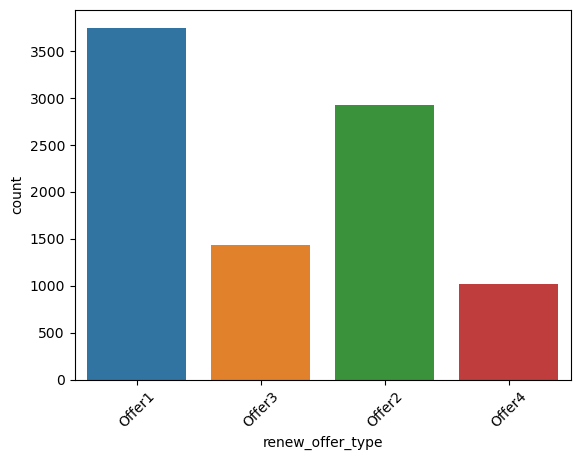

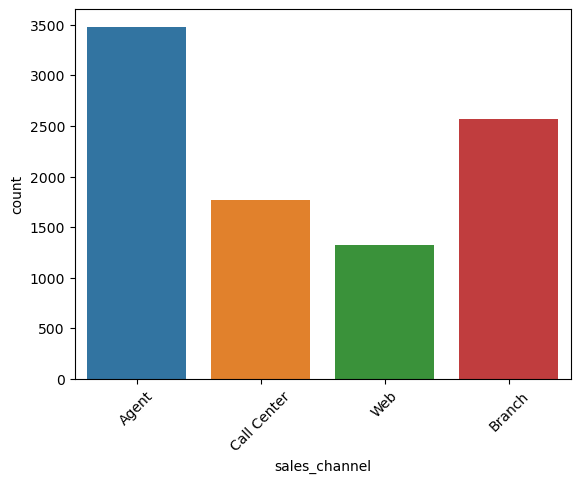

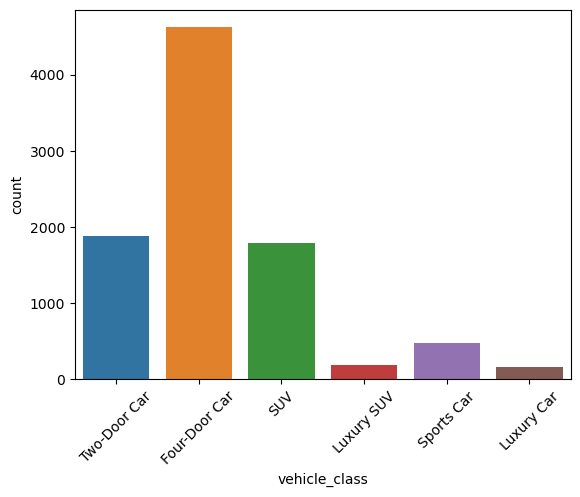

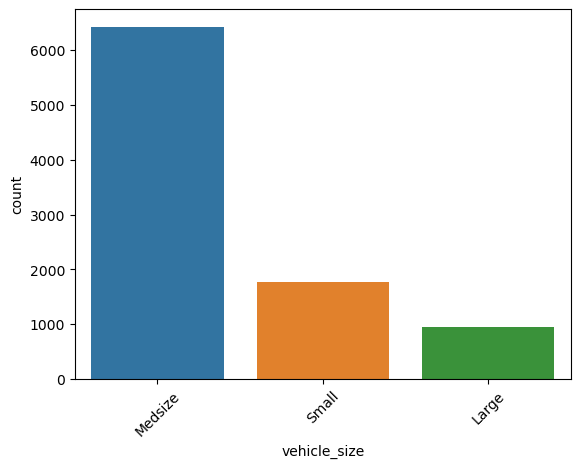

In [49]:
#Plot all the categorical variables with the proper plot.
for column in categorical.columns:
    sns.countplot(x=column, data=categorical)
    plt.xticks(rotation=45)
    plt.show()